In [1]:
! pwd

/grid/siepel/home_norepl/mo/circ-immu/plotting_scripts


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Conceptual plots

[]

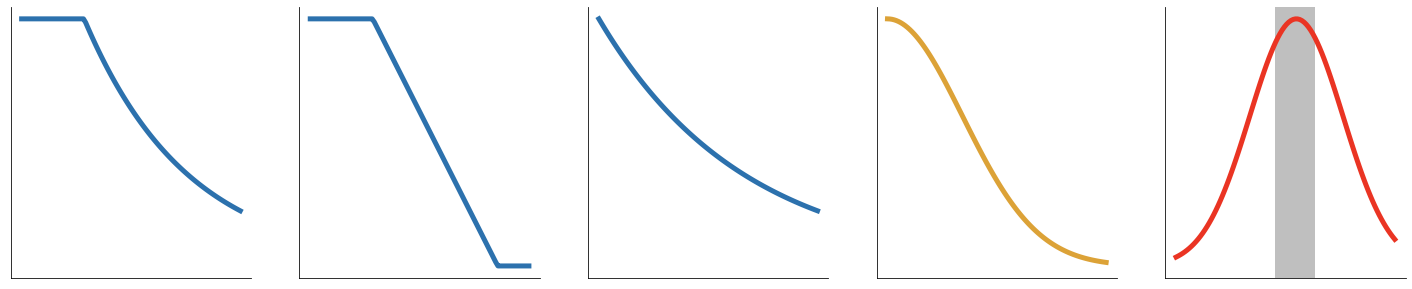

In [9]:
fig, (ax4, ax5, ax1, ax2, ax3) = plt.subplots(1, 5, sharey=True, sharex=False, figsize=(25, 5))

tmp_range = np.linspace(240, 310, 100)
ax4.plot(tmp_range, np.exp(-0.03*np.maximum(0, tmp_range-260))*0.8+1.2, c="#2c71ad", lw=5)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_xticks([])
ax4.set_yticks([])

ax5.plot(tmp_range, np.maximum(np.minimum(1.6-0.02*(tmp_range-280), 2), 1.2), c="#2c71ad", lw=5)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.set_xticks([])
ax5.set_yticks([])



hum_range = np.linspace(0, 0.02, 100)
ax1.plot(hum_range, np.exp(-75*hum_range)*0.8+1.2, c="#2c71ad", lw=5)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])

day_range = np.linspace(0, 1, 100)
ax2.plot(day_range, np.exp(-4.25*np.square(day_range))*0.8+1.2, c="#dca237", lw=5)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])

sun_range = np.linspace(0, 1, 100)
ax3.plot(sun_range, np.exp(-11*np.square(sun_range-0.55))*0.8+1.2, c="#ea3423", lw=5)
ax3.axvspan(0.45, 0.633, facecolor='0.5', alpha=0.5)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_xticks([])
ax3.set_yticks([])

#plt.tight_layout()
#plt.savefig("R0mechs.pdf")

### BIC plots

In [2]:
def BIC(negLL, k, n):
    return k*np.log(n)+2*negLL

In [11]:
### New flu fits with temperature models
cpalette = np.array(["#999999", "#0072B2", "#D55E00", "#CC79A7", "#F0E442", "#E69F00", "#009E73"])
mods = np.array(["base", "h", "t", "ht", "d", "td", "sd"])
no_prms = np.array([2, 2, 3, 4, 3, 5, 5])

In [19]:
## US
no_data = 40*523 # 40 jurisdictions, testing data of 523 weeks
# lambda = 1e1
# neg_LL = np.array([1166127.761211, 
#                    1083468.139198, 794176.627422, 794176.833163,
#                    729013.691463, 728901.185744, 708790.144141])
# lambda = 1e3
neg_LL = np.array([1530131.326863, 
                   1531781.916806, 1124987.579320, 1124987.608223,
                   1011509.488519, 1011793.433853, 1000423.545419])

In [24]:
## EU
no_data = 19*265 # 40 jurisdictions, testing data of 523 weeks

# lambda = 1e0
neg_LL = np.array([88080.257556,
                   96005.513961, 88211.383372, 88211.920462,
                   86286.143212, 85086.003508, 83644.675517])


# lambda = 1e1
#neg_LL = np.array([94130.506853, 102556.060478, 94204.014769, 91713.155926, 91649.474035, 90759.503694])
# lambda = 1e3
#neg_LL = np.array([167575.549965, 169404.446576, 156882.250707, 157198.036961, 156759.588200, 156801.176872])

In [3]:
cpalette = np.array(["#999999", "#0072B2", "#F0E442", "#E69F00", "#D55E00", "#56B4E9", "#009E73"])
mods = np.array(["base", "h", "d", "s", "sd", "hd", "hsd"])

In [14]:
## COVID hospitalization fit ##
no_data = 50*324 # 50 jurisdictions, 324 days from 03/13/2020 to 01/31/2021
no_prms = np.array([50+2+1, 50+2+1, 50+2+2, 50+2+1+9, 50+2+3+9, 50+2+3, 50+2+4+9])

# hosp rate = 2.6%
#neg_LL = np.array([7434203253, 15607111315, 6866896580, 8841000000, 5798075108, 6848815355, 5854646819])

# hosp rate = 5%
neg_LL = np.array([6793366617, 12266896845, 6646509850, 8716796416, 6083071230, 6533551013, 6082344989])

In [6]:
## Flu testing data fit ##
no_data = 40*523 # 40 jurisdictions, testing data of 523 weeks
no_prms = np.array([2, 2, 3, 3, 5, 4, 6])
# lambda = 1e1
#neg_LL = np.array([1166629.845061, 1089364.252814, 728915.911920, 817357.944783, 708852.803041, 728997.776427, 706595.238344])
# lambda = 1e3
neg_LL = np.array([1530948.859941, 1534727.097171, 1011341.089078, 1090222.638146, 1000324.222549, 1011439.151931, 1000520.782227])

In [25]:
BIC_OI = BIC(neg_LL, no_prms, no_data)

In [26]:
print(BIC_OI)

[176177.56344961 192028.07625961 176448.33925042 176457.93759922
 172597.85893042 170214.62786003 167331.97187803]


In [27]:
rel_BIC = BIC_OI[0] - BIC_OI
#BIC_ratio = BIC_OI/BIC_OI[0]
#print(BIC_OI, rel_BIC, "\n", BIC_ratio)

In [4]:
## COVID death fit ##
rel_BIC = np.array([0, 754717.6, 946925.2174, 848346.5562, 973452.5909, 946830.4347, 972941.0083]) # d=0.01

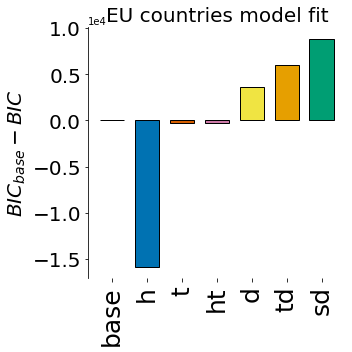

In [30]:
#x_pos = np.array([i for i, _ in enumerate(mods)])
#mask = np.array([True, False, True, False, True, False, False])
mask = np.array([True, True, True, True, True, True, True])

fig, ax = plt.subplots(figsize=(5, 5))

ax.bar(np.arange(np.sum(mask)), rel_BIC[mask], width=0.7, color=cpalette[mask], edgecolor="#000000")

#ax.set_ylim(-0.3e9, 2e9)  # top

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks(np.arange(np.sum(mask)))
ax.set_xticklabels(mods[mask], rotation=90, fontsize=25)
ax.set_ylabel(r"$BIC_{base}-BIC$", fontsize=20)
ax.set_title("EU countries model fit", fontsize=20)

ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.tick_params(axis='y', labelsize=20)

plt.tight_layout()
plt.savefig("plots/EU_states_1e0_BIC.pdf")

In [18]:
no_data = 50*324 # 50 jurisdictions, 324 days from 03/13/2020 to 01/31/2021

# fit more SEIH params
# cpalette = np.array(["#999999", "#0072B2", "#F0E442", "#F0E442", "#D55E00"])
# mods = np.array(["base", "h", "s", "d", "sd"])
# no_prms = np.array([50+4+1, 50+4+1, 50+4+2, 50+4+2, 50+4+4])
# neg_LL = np.array([9524073653, 11646396306, 11401031264, 6279636702, 6153960663])
# mask = np.array([True, True, True, True, True])

# # original setup
cpalette = np.array(["#999999", "#0072B2", "#F0E442", "#F0E442", "#F0E442", "#D55E00"])
mods = np.array(["base", "h", "s", "sAsym", "d", "sd"])
no_prms = np.array([50+3+1, 50+3+1, 50+3+2, 50+3+3, 50+3+2, 50+3+4])
neg_LL = np.array([7967436642, 13344951680, 14517135145, 13024881440, 6165674777, 6057890494])
mask = np.array([True, True, True, True, True, True])

# # fix range of Rt
# cpalette = np.array(["#999999", "#0072B2", "#F0E442", "#F0E442", "#D55E00"])
# mods = np.array(["base", "h", "s", "d", "sd"])
# no_prms = np.array([50+1+1, 50+1+1, 50+1+2, 50+1+2, 50+1+9+3])
# neg_LL = np.array([16151272673, 14054280962, 15511738519, 6222329188, 5861951433])
# mask = np.array([True, True, True, True, True])

BIC_OI = BIC(neg_LL, no_prms, no_data)
rel_BIC = BIC_OI[0] - BIC_OI

In [5]:
print(rel_BIC)

[     0.     754717.6    946925.2174 848346.5562 973452.5909 946830.4347
 972941.0083]


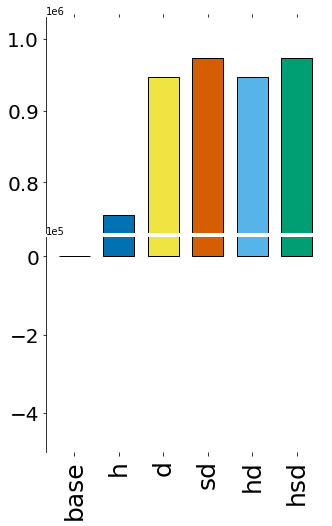

In [11]:
#x_pos = [i for i, _ in enumerate(mods)]
mask = np.array([True, True, True, False, True, True, True])
#mask = np.array([True, False, True, False, True, False, False])

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5,8))
fig.subplots_adjust(hspace=0.02)  # adjust space between axes

# plot the same data on both axes
ax1.bar(np.arange(np.sum(mask)), rel_BIC[mask], width=0.7, color=cpalette[mask], edgecolor="#000000")
ax2.bar(np.arange(np.sum(mask)), rel_BIC[mask], width=0.7, color=cpalette[mask], edgecolor="#000000")

# zoom-in / limit the view to different portions of the data
# ax1.set_ylim(0.95*np.min(rel_BIC[2:]), 1.05*np.max(rel_BIC[2:]))  # top
# bottom_lims = [1.1*rel_BIC[1], -0.1*rel_BIC[1]]
# ax2.set_ylim(np.min(bottom_lims), np.max(bottom_lims))   # bottom

ax1.set_ylim(7.3e5, 10.3e5)  # top
#ax2.set_ylim(-2.2e10, 2e9)   # bottom
ax2.set_ylim(-5e5, 0.5e5)   # bottom

# hide the spines between ax and ax2
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

# d = .5  # proportion of vertical to horizontal extent of the slanted line
# kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
#               linestyle="none", color='k', mec='k', mew=1, clip_on=False)
# ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
# ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax2.set_xticks(np.arange(np.sum(mask)))
ax2.set_xticklabels(mods[mask], rotation=90, fontsize=25)

ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax1.tick_params(axis='y', labelsize=20)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax2.tick_params(axis='y', labelsize=20)

# ax2.bar(x_pos, BIC_ratio-1, width=0.7, bottom=1, color=cpalette, edgecolor="#000000")
# #ax2.hlines(1, -1, 6, colors='k', linestyles='dashed')
# ax2.set_ylim(-0.01, 1.1)
# ax2.set_xticks(x_pos)
# ax2.set_xticklabels(mods, rotation=90, fontsize=25)
# ax2.tick_params(axis='y', labelsize=20)
# ax2.spines['right'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)

plt.savefig("COVID_ALL_death.01.pdf")

In [30]:
missing_dat = pd.read_csv("circ-immu-dat/missing_data.tsv", sep="\t", usecols=[0, 3])

In [31]:
good_state = missing_dat["code"][missing_dat["missing"] < 100]

In [32]:
good_state

19    NM
20    NC
21    OR
22    TN
23    CT
24    MA
25    SC
26    MD
27    AR
28    SD
29    OK
30    NE
31    LA
32    OH
33    NY
34    WA
35    WI
36    MO
37    KY
38    AL
39    IL
40    VA
41    MN
42    UT
43    HI
44    CO
45    PA
46    AZ
47    CA
48    GA
49    IN
50    TX
51    WV
Name: code, dtype: object

In [2]:
## Per-state results ##

per_state = pd.read_csv("circ-immu-dat/state_fits_1e1.tsv", delimiter="\t", header=0, index_col=0)

In [40]:
per_state = per_state.apply(lambda xx: BIC(xx, no_prms, 523), axis=0)

In [7]:
per_state["LA"]

cos    35067.467259
hum    29460.981166
day    17211.971868
sd     16585.268582
hd     17222.240176
hsd    17277.446809
Name: LA, dtype: float64

In [42]:
#mask = np.isin(states, good_state)
mask = np.ones(40).astype(bool)

In [49]:
#d_improv = per_state.loc["cos"][mask] - per_state.loc["day"][mask]
#sd_improv = per_state.loc["cos"][mask] - per_state.loc["sd"][mask]

h_improv = per_state.loc["cos"][mask] - per_state.loc["hum"][mask]
hd_improv = per_state.loc["cos"][mask] - per_state.loc["hd"][mask]
hsd_improv = per_state.loc["cos"][mask] - per_state.loc["hsd"][mask]

In [50]:
order = np.argsort(hsd_improv)

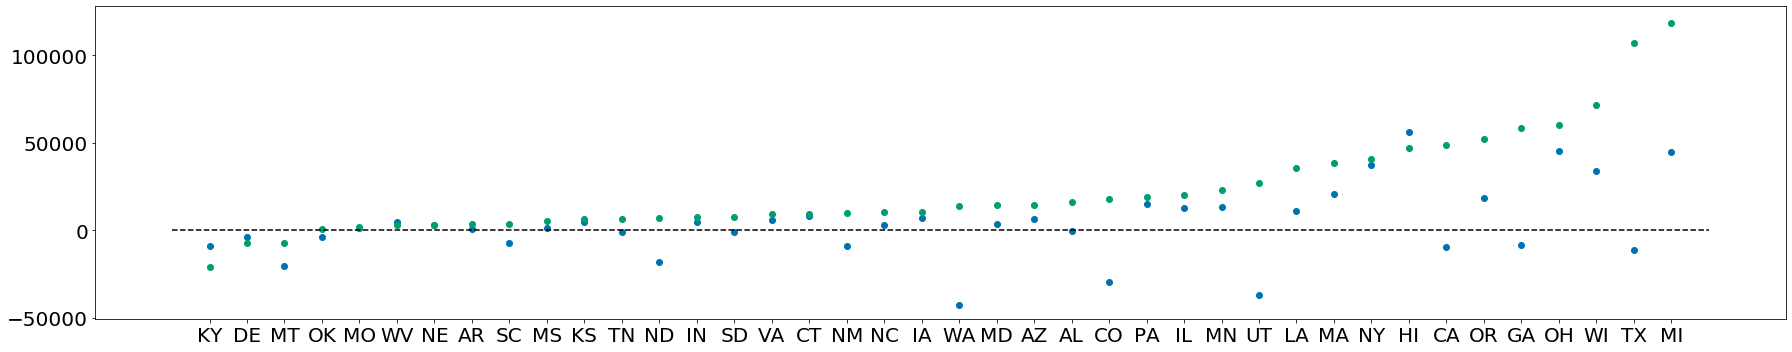

In [52]:
fig, ax = plt.subplots(figsize=(25,5))

ax.scatter(per_state.columns[mask][order], h_improv[order], c="#0072B2")
#ax.scatter(per_state.columns[mask][order], hd_improv[order], c="#56B4E9")
ax.scatter(per_state.columns[mask][order], hsd_improv[order], c="#009E73")
#ax.set_ylim(0, 2)
ax.hlines(0, -1, sum(mask), colors='k', linestyles='dashed')
ax.tick_params(axis='both', labelsize=20)
plt.tight_layout()
#plt.savefig(f"state{l_pnl}sort_hs2d.pdf")

In [33]:
import matplotlib.ticker as mtick
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

### Avg Infection Plots

In [13]:
state_pop = pd.read_csv("../env_covar/US_pop.tsv", sep="\t", usecols=[0, 1])

In [3]:
## Data side
infection_df = pd.read_csv("../flu_fit/p_estimator.tsv", sep="\t")
pop_denom_df = pd.read_csv("../flu_fit/denom_estimator.tsv", sep="\t")

In [4]:
rate_df = infection_df.iloc[:, :2]

In [5]:
rate_df["I_rate"] = infection_df.iloc[:, 2:].sum(axis=1)/pop_denom_df.iloc[:, 2:].sum(axis=1)

In [6]:
std_I = rate_df.groupby(["WEEK"]).std()["I_rate"]

In [7]:
mean_I = rate_df.groupby(["WEEK"]).mean()["I_rate"]

In [8]:
plot_mean = np.concatenate((mean_I[39:], mean_I[:39]))*100
plot_std = np.concatenate((std_I[39:], std_I[:39]))*100

In [2]:
# Model side
inf_d = pd.read_table("../flu_fit/annual_inf_d.tsv")
inf_sd = pd.read_table("../flu_fit/annual_inf_sd.tsv")
inf_t = pd.read_table("../flu_fit/annual_inf_t.tsv")

In [20]:
tot_pop = np.sum(state_pop.loc[state_pop['code'].isin(list(inf_d.columns)), "pop"])

In [27]:
tot_traj_d = inf_d.sum(axis=1)/tot_pop*100*0.338852
tot_traj_sd = inf_sd.sum(axis=1)/tot_pop*100*0.372740
tot_traj_t = inf_t.sum(axis=1)/tot_pop*100*0.323221

In [28]:
## reorder dates to match fall to fall flu season
tot_traj_d = pd.concat([tot_traj_d[39*7:], tot_traj_d[:39*7]])
tot_traj_sd = pd.concat([tot_traj_sd[39*7:], tot_traj_sd[:39*7]])
tot_traj_t = pd.concat([tot_traj_t[39*7:], tot_traj_t[:39*7]])

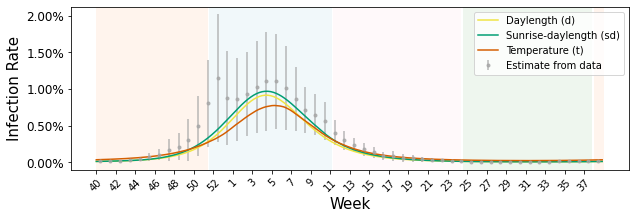

In [49]:
lweight = 1.5

fig, ax1 = plt.subplots(figsize=(10, 3))

ax1.axvspan(0, 354-274, facecolor='#ff7518', alpha=0.075) # Fall
ax1.axvspan(354-273, 364-273+78, facecolor='#50A3C6', alpha=0.075) # Winter
ax1.axvspan(364-273+79, 364-273+171, facecolor='#ffb7c5', alpha=0.075) # Spring
ax1.axvspan(364-273+172, 364-273+265, facecolor='#228b22', alpha=0.075) # Summer
ax1.axvspan(364-273+266, 364, facecolor='#ff7518', alpha=0.075) # Fall

"#999999", "#0072B2", "#D55E00", "#CC79A7", "#F0E442", "#E69F00", "#009E73"

ax1.plot(np.arange(364), tot_traj_d, c="#F0E442", lw=lweight, label = "Daylength (d)")
#ax1.fill_between(np.arange(364), inf_traj_dst["V1"]+stdev_dst, np.maximum(inf_traj_dst["V1"]-stdev_dst, 0), alpha=transp, color="#D55E00")
ax1.plot(np.arange(364), tot_traj_sd, c="#009E73", lw=lweight, label = "Sunrise-daylength (sd)")
#ax1.fill_between(np.arange(364), inf_traj_sansdst["V1"]+stdev_sansdst, np.maximum(inf_traj_sansdst["V1"]-stdev_sansdst, 0), alpha=transp*0.5, color="#7570B3")
ax1.plot(np.arange(364), tot_traj_t, c="#D55E00", lw=lweight, label = "Temperature (t)")
#ax1.fill_between(np.arange(364), inf_traj_permdst["V1"]+stdev_permdst, np.maximum(inf_traj_permdst["V1"]-stdev_permdst, 0), alpha=transp*0.5, color="#800000")

ax1.errorbar(np.arange(52)*7 + 3, plot_mean, yerr=plot_std, fmt='.', alpha=0.8, c="#a6a6a6", label="Estimate from data")

#ax1.fill_between(np.arange(52)*7 + 3, plot_mean-plot_std, plot_mean+plot_std)
ax1.tick_params(axis='y', labelsize=12)
ax1.legend(loc="upper right")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set_xticks(np.arange(start=0,stop=364, step=14))
ax1.set_xticklabels(map(str, np.concatenate((np.arange(40, 53, 2), np.arange(1, 39, 2)))), rotation=45, fontsize=10)

ax1.set_xlabel("Week", fontsize=15)
ax1.set_ylabel("Infection Rate", fontsize=15)

plt.savefig("plots/model_pred_plot.pdf")

### Flu counterfactual simulations

In [9]:
plot_mean = np.concatenate((mean_I[39:], mean_I[:39]))*100/0.373150

In [10]:
plot_std = np.concatenate((std_I[39:], std_I[:39]))*100/0.373150

In [9]:
np.arange(52)*7 + 3 # center on Thursday

array([  3,  10,  17,  24,  31,  38,  45,  52,  59,  66,  73,  80,  87,
        94, 101, 108, 115, 122, 129, 136, 143, 150, 157, 164, 171, 178,
       185, 192, 199, 206, 213, 220, 227, 234, 241, 248, 255, 262, 269,
       276, 283, 290, 297, 304, 311, 318, 325, 332, 339, 346, 353, 360])

In [13]:
l_pnl = "1e1"
handle = "bootApr6"
#c = 

inf_traj_dst = pd.read_csv(f"../flu_fit/fluepi{l_pnl}sd_{handle}_sims_dstTraj.tsv", sep="\t")
inf_traj_sansdst = pd.read_csv(f"../flu_fit/fluepi{l_pnl}sd_{handle}_sims_sansdstTraj.tsv", sep="\t")
inf_traj_permdst = pd.read_csv(f"../flu_fit/fluepi{l_pnl}sd_{handle}_sims_permdstTraj.tsv", sep="\t")

In [14]:
RC_permdst = pd.read_csv(f"../flu_fit/fluepi{l_pnl}sd_{handle}_sims_permdstRC.tsv", sep="\t")
RC_sansdst = pd.read_csv(f"../flu_fit/fluepi{l_pnl}sd_{handle}_sims_sansdstRC.tsv", sep="\t")

In [15]:
tot_pop = np.sum(state_pop.loc[state_pop['code'].isin(list(RC_permdst.index[:-1])), "pop"])

In [16]:
## reorder dates to match fall to fall flu season
inf_traj_dst = pd.concat([inf_traj_dst[39*7:], inf_traj_dst[:39*7]])/tot_pop*100
inf_traj_sansdst = pd.concat([inf_traj_sansdst[39*7:], inf_traj_sansdst[:39*7]])/tot_pop*100
inf_traj_permdst = pd.concat([inf_traj_permdst[39*7:], inf_traj_permdst[:39*7]])/tot_pop*100

In [17]:
stdev_dst = inf_traj_dst.std(axis=1)
stdev_sansdst = inf_traj_sansdst.std(axis=1)
stdev_permdst = inf_traj_permdst.std(axis=1)

In [18]:
sansDST_change = inf_traj_sansdst-inf_traj_dst
permDST_change = inf_traj_permdst-inf_traj_dst

In [19]:
stdev_sansC = sansDST_change.std(axis=1)
stdev_permC = permDST_change.std(axis=1)

In [21]:
lweight = 1.5
transp = 0.3

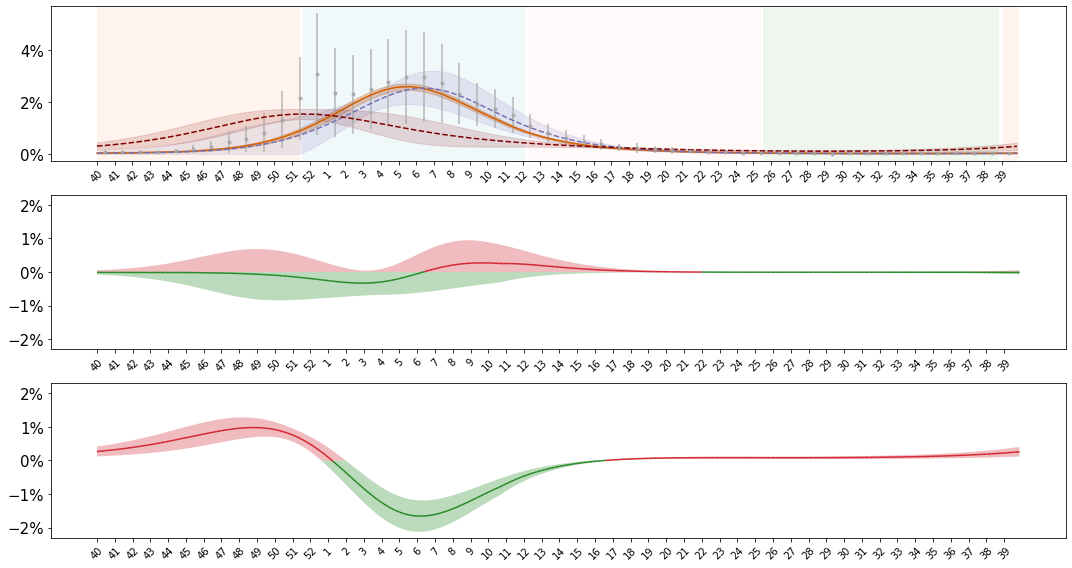

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=False, sharex=False, figsize=(15, 8))

ax1.axvspan(0, 354-274, facecolor='#ff7518', alpha=0.075) # Fall
ax1.axvspan(354-273, 364-273+78, facecolor='#50A3C6', alpha=0.075) # Winter
ax1.axvspan(364-273+79, 364-273+171, facecolor='#ffb7c5', alpha=0.075) # Spring
ax1.axvspan(364-273+172, 364-273+265, facecolor='#228b22', alpha=0.075) # Summer
ax1.axvspan(364-273+266, 364, facecolor='#ff7518', alpha=0.075) # Fall

ax1.plot(np.arange(364), inf_traj_dst["V1"], c="#D55E00", lw=lweight, label = "Current implementation of DST")
ax1.fill_between(np.arange(364), inf_traj_dst["V1"]+stdev_dst, np.maximum(inf_traj_dst["V1"]-stdev_dst, 0), alpha=transp, color="#D55E00")
ax1.plot(np.arange(364), inf_traj_sansdst["V1"], c="#7570B3", ls="--", lw=lweight, label = "Permanent standard time")
ax1.fill_between(np.arange(364), inf_traj_sansdst["V1"]+stdev_sansdst, np.maximum(inf_traj_sansdst["V1"]-stdev_sansdst, 0), alpha=transp*0.5, color="#7570B3")
ax1.plot(np.arange(364), inf_traj_permdst["V1"], c="#800000", ls="--", lw=lweight, label = "Permanent DST")
ax1.fill_between(np.arange(364), inf_traj_permdst["V1"]+stdev_permdst, np.maximum(inf_traj_permdst["V1"]-stdev_permdst, 0), alpha=transp*0.5, color="#800000")

ax1.errorbar(np.arange(52)*7 + 3, plot_mean, yerr=plot_std, fmt='.', alpha=0.8, c="#a6a6a6", label="Estimate from data")

#ax1.fill_between(np.arange(52)*7 + 3, plot_mean-plot_std, plot_mean+plot_std)
ax1.tick_params(axis='both', labelsize=15)
#ax1.legend()
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
#ax1.set_ylim(-0.1, 3.1)
ax1.set_xticks(np.arange(start=0,stop=364, step=7))
ax1.set_xticklabels(map(str, np.concatenate((np.arange(40, 53), np.arange(1, 40)))), rotation=45, fontsize=10)

points = np.array([np.arange(364), sansDST_change["V1"]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
cmap = ListedColormap(['#238823', '#D2222D'])
norm = BoundaryNorm([-1, 0, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(sansDST_change["V1"])
lc.set_linewidth(lweight)
line = ax2.add_collection(lc)

ax2.fill_between(np.arange(364), np.minimum(0, sansDST_change["V1"]-stdev_sansC),
                 np.minimum(0, sansDST_change["V1"]+stdev_sansC), facecolor='#238823', alpha=transp)
ax2.fill_between(np.arange(364), np.maximum(sansDST_change["V1"]-stdev_sansC, 0),
                 np.maximum(sansDST_change["V1"]+stdev_sansC, 0), facecolor='#D2222D', alpha=transp)

# ax2.fill_between(np.arange(364), np.zeros(364), sansDST_change["V1"], where=sansDST_change["V1"]>=0, facecolor='#D2222D', interpolate=True)
# ax2.fill_between(np.arange(364), np.zeros(364), sansDST_change["V1"], where=sansDST_change["V1"]<0, facecolor='#238823', interpolate=True)

ax2.tick_params(axis='y', labelsize=15)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax2.set_ylim(-2.3, 2.3)
ax2.set_xticks(np.arange(start=0,stop=364, step=7))
ax2.set_xticklabels(map(str, np.concatenate((np.arange(40, 53), np.arange(1, 40)))), rotation=45, fontsize=10)

points = np.array([np.arange(364), permDST_change["V1"]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(permDST_change["V1"])
lc.set_linewidth(lweight)
line = ax3.add_collection(lc)

ax3.fill_between(np.arange(364), np.minimum(0, permDST_change["V1"]-stdev_permC),
                 np.minimum(0, permDST_change["V1"]+stdev_permC), facecolor='#238823', alpha=transp)
ax3.fill_between(np.arange(364), np.maximum(permDST_change["V1"]-stdev_permC, 0),
                 np.maximum(permDST_change["V1"]+stdev_permC, 0), facecolor='#D2222D', alpha=transp)

# ax3.fill_between(np.arange(364), np.zeros(364), permDST_change["V1"], where=permDST_change["V1"]>=0, facecolor='#D2222D', interpolate=True)
# ax3.fill_between(np.arange(364), np.zeros(364), permDST_change["V1"], where=permDST_change["V1"]<0, facecolor='#238823', interpolate=True)

ax3.tick_params(axis='y', labelsize=15)
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax3.set_ylim(-2.3, 2.3)
ax3.set_xticks(np.arange(start=0,stop=364, step=7))
ax3.set_xticklabels(map(str, np.concatenate((np.arange(40, 53), np.arange(1, 40)))), rotation=45, fontsize=10)

plt.tight_layout()
plt.savefig(f"plots/sd_sim_traj_{l_pnl}_band.pdf")

In [56]:
# l_pnl = "1e1"

# RC_permdst = pd.read_csv(f"circ-immu-dat/states_QC200.tsv{l_pnl}sd_bootsims_trial_permdstRC.tsv", sep="\t")
# RC_sansdst = pd.read_csv(f"circ-immu-dat/states_QC200.tsv{l_pnl}sd_bootsims_trial_sansdstRC.tsv", sep="\t")

In [24]:
order = np.argsort(-RC_sansdst["X1"]/RC_permdst["X1"])

In [25]:
sanspos_err = RC_sansdst.max(axis=1) - RC_sansdst["X1"]
sansneg_err = RC_sansdst["X1"] - RC_sansdst.min(axis=1)

permpos_err = RC_permdst.max(axis=1) - RC_permdst["X1"]
permneg_err = RC_permdst["X1"] - RC_permdst.min(axis=1)

In [26]:
sanspos_err = RC_sansdst.std(axis=1)
sansneg_err = RC_sansdst.std(axis=1)

permpos_err = RC_permdst.std(axis=1)
permneg_err = RC_permdst.std(axis=1)

In [27]:
RC_permdst["X1"]["ALL"], RC_sansdst["X1"]["ALL"]

(-0.0599749596098237, -0.007968697970686809)

In [28]:
#RC_permdst["X1"]
sanspos_err["ALL"], sansneg_err["ALL"], permpos_err["ALL"], permneg_err["ALL"]

(0.02474809115762828,
 0.02474809115762828,
 0.019829349166670167,
 0.019829349166670167)

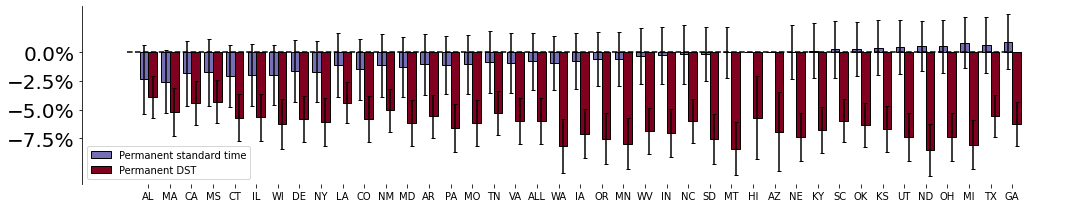

In [31]:
fig, ax = plt.subplots(figsize=(15,3))

x = np.arange(RC_sansdst.shape[0])  # the label locations
wdh = 0.4  # the width of the bars

ax.bar(x - wdh/2, RC_sansdst["X1"][order]*100, yerr = np.vstack((sansneg_err[order]*100, sanspos_err[order]*100)),
       width=wdh, edgecolor="#000000", color="#7570B3", label = "Permanent standard time", capsize=2)
ax.bar(x + wdh/2, RC_permdst["X1"][order]*100, yerr = np.vstack((permneg_err[order]*100, permpos_err[order]*100)),
       width=wdh, edgecolor="#000000", color="#800020", label = "Permanent DST", capsize=2)

ax.tick_params(axis='y', labelsize=20)
#ax.set_ylim(np.min((perc_reduction[order]-1)*100)-1, 0.8)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
ax.hlines(0, -1, 40, colors='k', linestyles='dashed')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(x)
ax.set_xticklabels(RC_sansdst.index[order])
#ax.set_ylim(-9.3, 1.3)
ax.set_yticks([0, -2.5, -5, -7.5])
ax.legend()
plt.tight_layout()
plt.savefig(f"plots/sd_state_reduc{l_pnl}_booterr.pdf")